# Cette cellule Notebook doit être activée seulement dans Google Colab
# Elle permet de monter l'environnement dans ce contexte
import os
if not os.path.exists('minamp2.py'):
    !wget https://raw.githubusercontent.com/caush/MinAmp/master/minamp2.py

In [15]:
import minamp2 as mn

In [18]:
import importlib
importlib.reload(mn)

<module 'minamp2' from 'c:\\Users\\herve\\OneDrive\\Projet\\MinAmp\\minamp2.py'>

Le système est entrainé sur 512 sous échantillons de taille 512.
Le ratio entre la taille de ces sous échantillons et le nombre de phases est de 2.0.
Hardware utilisé : cuda:0
256 phases (première 1), 512 sous échantillons de taille 512 (periode 1.0), 5 rondes (0.330044)
Ronde 1
Amplitude(entrainement): 0.294656  [    0/262144]
Amplitude(entrainement): 0.229908  [131072/262144]
Amplitude(test): 0.205502
Ronde 2
Amplitude(entrainement): 0.202662  [    0/262144]
Amplitude(entrainement): 0.192559  [131072/262144]
Amplitude(test): 0.185087
Ronde 3
Amplitude(entrainement): 0.184936  [    0/262144]
Amplitude(entrainement): 0.178375  [131072/262144]
Amplitude(test): 0.174672
Ronde 4
Amplitude(entrainement): 0.173458  [    0/262144]
Amplitude(entrainement): 0.169732  [131072/262144]
Amplitude(test): 0.167410
Ronde 5
Amplitude(entrainement): 0.166696  [    0/262144]
Amplitude(entrainement): 0.164094  [131072/262144]
Amplitude(test): 0.162533


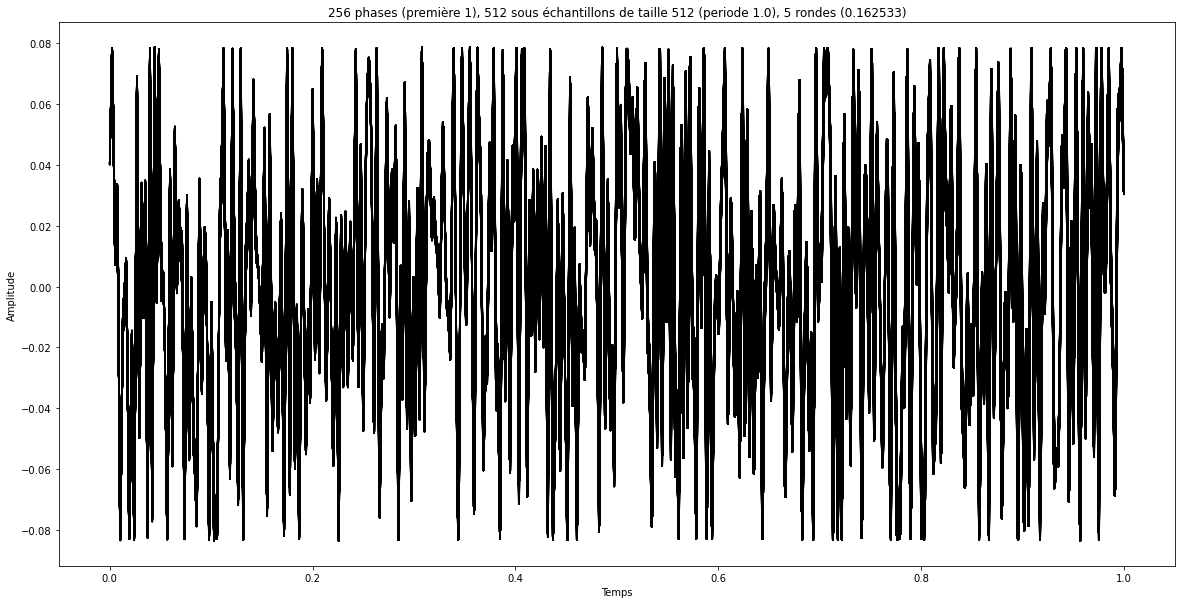

In [17]:
cadreExperimental = mn.CadreExperimental(nombrePhases=256, premierePhase=1)
cadreExperimental.entraine()

Le système est entrainé sur 512 sous échantillons de taille 512.
Le ratio entre la taille de ces sous échantillons et le nombre de phases est de 2.0.
Hardware utilisé : cuda:0
256 phases (première 10), 512 sous échantillons de taille 512 (periode 1.0), 5 rondes (0.300448)
Ronde 1
Amplitude(entrainement): 0.264052  [    0/262144]
Amplitude(entrainement): 0.220068  [131072/262144]
Amplitude(test): 0.206647
Ronde 2
Amplitude(entrainement): 0.203677  [    0/262144]
Amplitude(entrainement): 0.191308  [131072/262144]
Amplitude(test): 0.184441
Ronde 3
Amplitude(entrainement): 0.182949  [    0/262144]
Amplitude(entrainement): 0.178140  [131072/262144]
Amplitude(test): 0.175125
Ronde 4
Amplitude(entrainement): 0.175039  [    0/262144]
Amplitude(entrainement): 0.170319  [131072/262144]
Amplitude(test): 0.167744
Ronde 5
Amplitude(entrainement): 0.166817  [    0/262144]
Amplitude(entrainement): 0.164918  [131072/262144]
Amplitude(test): 0.163578


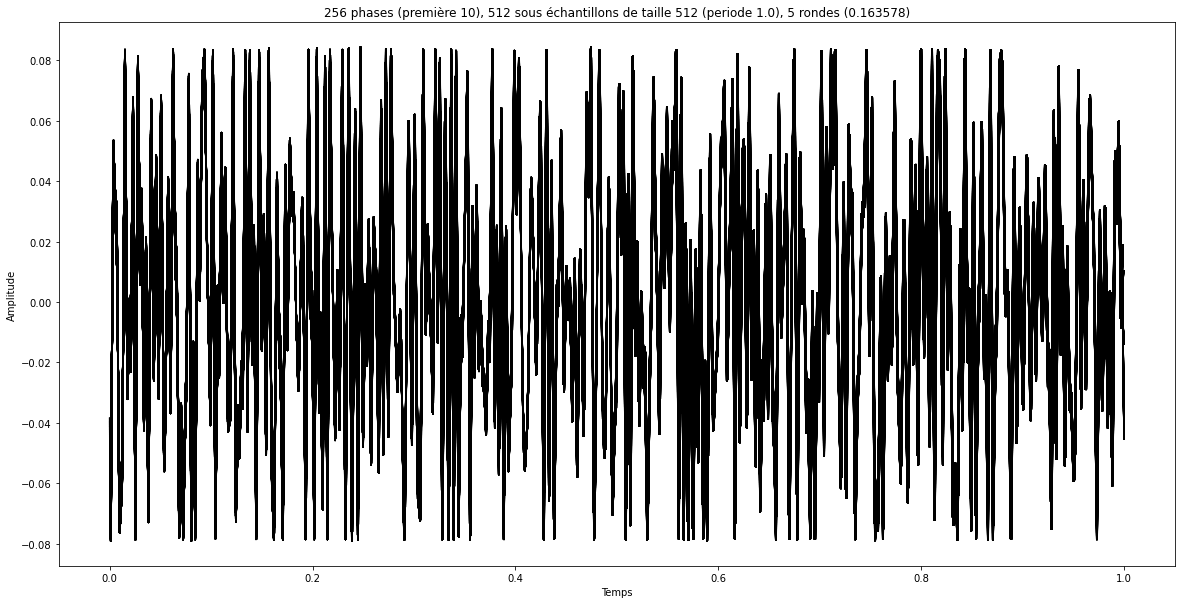

In [4]:
cadreExperimental =  mn.CadreExperimental(nombrePhases=256, premierePhase=10)
cadreExperimental.entraine()

Le système est entrainé sur 512 sous échantillons de taille 512.
Le ratio entre la taille de ces sous échantillons et le nombre de phases est de 42.666666666666664.
Hardware utilisé : cuda:0
12 phases (première 6), 512 sous échantillons de taille 512 (periode 1.0), 5 rondes (0.660207)
Ronde 1
Amplitude(entrainement): 0.660182  [    0/262144]
Amplitude(entrainement): 0.532041  [131072/262144]
Amplitude(test): 0.521815
Ronde 2
Amplitude(entrainement): 0.521025  [    0/262144]
Amplitude(entrainement): 0.514193  [131072/262144]
Amplitude(test): 0.512805
Ronde 3
Amplitude(entrainement): 0.512210  [    0/262144]
Amplitude(entrainement): 0.511435  [131072/262144]
Amplitude(test): 0.510394
Ronde 4
Amplitude(entrainement): 0.509891  [    0/262144]
Amplitude(entrainement): 0.509128  [131072/262144]
Amplitude(test): 0.509178
Ronde 5
Amplitude(entrainement): 0.508510  [    0/262144]
Amplitude(entrainement): 0.508824  [131072/262144]
Amplitude(test): 0.509208


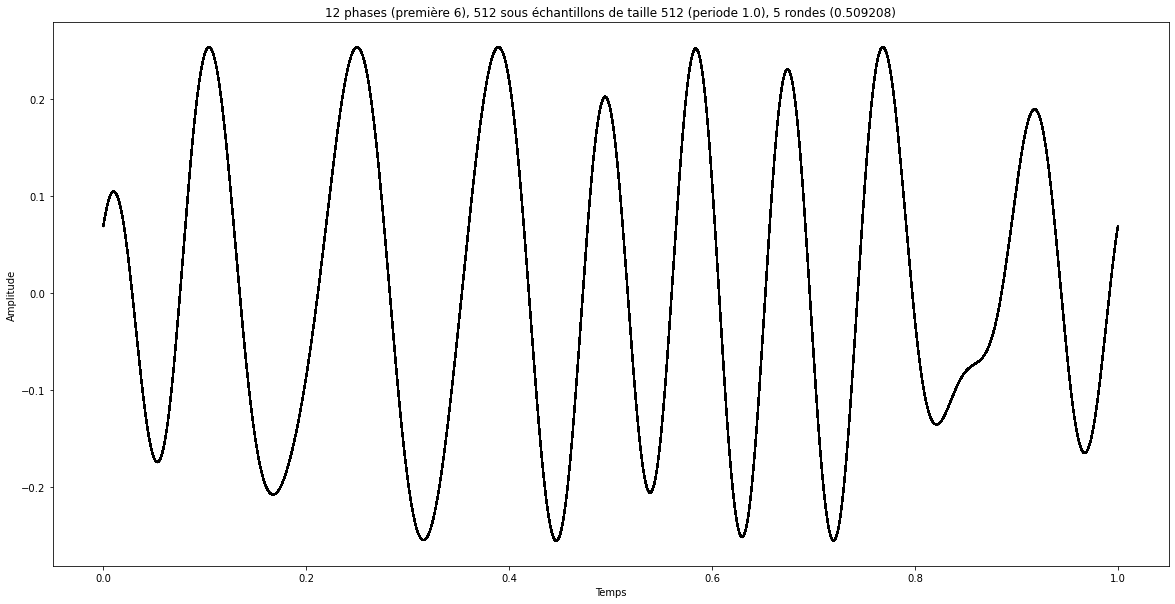

In [5]:
cadreExperimental = mn.CadreExperimental(nombrePhases=12, premierePhase=6)
cadreExperimental.entraine()

In [6]:
cadreExperimental.sauver()

'12 phases (première 6), 512 sous échantillons de taille 512 (periode 1.0), 5 rondes (0.509208)'

In [22]:
cadreExperimental = mn.CadreExperimental(nombrePhases=12, premierePhase=6)

Le système est entrainé sur 512.0 sous échantillons de taille 512.
Le ratio entre la taille de ces sous échantillons et le nombre de phases est de 42.666666666666664.
Hardware utilisé : cuda:0


In [7]:
cadreExperimental.signature()

'12 phases (première 6), 512 sous échantillons de taille 512 (periode 1.0), 5 rondes (0.509208)'

In [8]:
cadreExperimental.lire()

'12 phases (première 6), 512 sous échantillons de taille 512 (periode 1.0), 5 rondes (0.509208)'

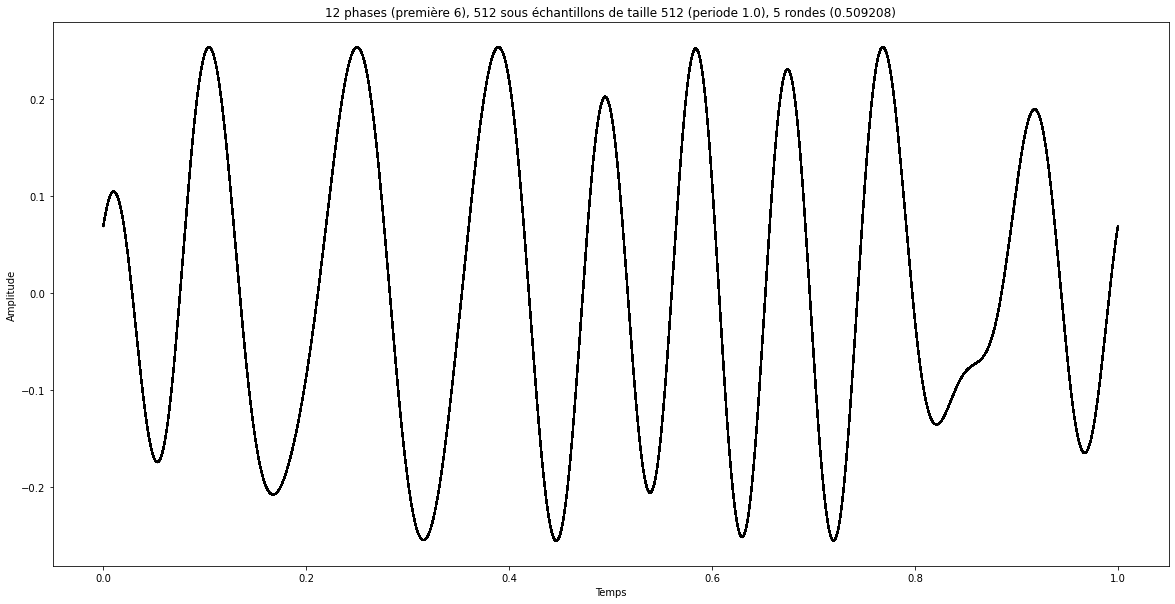

In [9]:
cadreExperimental.dessine()

In [10]:
cadreExperimental = mn.CadreExperimental(nombrePhases=2, premierePhase=2)
cadreExperimental.entraine(trace=0, dessine=0)

Le système est entrainé sur 512 sous échantillons de taille 512.
Le ratio entre la taille de ces sous échantillons et le nombre de phases est de 256.0.
Hardware utilisé : cuda:0


In [11]:
cadreExperimental.signature()

'2 phases (première 2), 512 sous échantillons de taille 512 (periode 1.0), 5 rondes (1.000000)'

In [23]:
for nombrePhases in [64, 128, 256]:
    for premierePhase in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
        for tailleSousEchantillon in [128, 256, 512]:
            for nombreSousEchantillons in [128, 256, 512]:
                cadreExperimental = mn.CadreExperimental(nombrePhases=nombrePhases,\
                    premierePhase=premierePhase,\
                    tailleSousEchantillon=tailleSousEchantillon,\
                    nombreSousEchantillons=nombreSousEchantillons,
                    rondes=5)
                cadreExperimental.entraine(dessine=0, trace=0)
                cadreExperimental.sauve()

Le système est entrainé sur 128 sous échantillons de taille 128.
Le ratio entre la taille de ces sous échantillons et le nombre de phases est de 2.0.
Hardware utilisé : cuda:0
Amplitude(test): 0.489055
Amplitude(test): 0.449569
Amplitude(test): 0.413224
Amplitude(test): 0.389802
Amplitude(test): 0.377316
Le système est entrainé sur 256 sous échantillons de taille 128.
Le ratio entre la taille de ces sous échantillons et le nombre de phases est de 2.0.
Hardware utilisé : cuda:0
Amplitude(test): 0.481154
Amplitude(test): 0.406779
Amplitude(test): 0.369753
Amplitude(test): 0.354663
Amplitude(test): 0.342211
Le système est entrainé sur 512 sous échantillons de taille 128.
Le ratio entre la taille de ces sous échantillons et le nombre de phases est de 2.0.
Hardware utilisé : cuda:0
Amplitude(test): 0.370459
Amplitude(test): 0.335123
Amplitude(test): 0.317251
Amplitude(test): 0.306936
Amplitude(test): 0.298307
Le système est entrainé sur 128 sous échantillons de taille 256.
Le ratio entre la

Le système est entrainé sur 512 sous échantillons de taille 512.
Le ratio entre la taille de ces sous échantillons et le nombre de phases est de 0.5.
Hardware utilisé : cuda:0
1024 phases (première 1), 512 sous échantillons de taille 512 (periode 1.0), 15 rondes (0.183475)
Ronde 1
Amplitude(entrainement): 0.122137  [    0/262144]
Amplitude(entrainement): 0.121996  [131072/262144]
Amplitude(test): 0.120158
Ronde 2
Amplitude(entrainement): 0.113966  [    0/262144]
Amplitude(entrainement): 0.102380  [131072/262144]
Amplitude(test): 0.102280
Ronde 3
Amplitude(entrainement): 0.099541  [    0/262144]
Amplitude(entrainement): 0.096732  [131072/262144]
Amplitude(test): 0.096690
Ronde 4
Amplitude(entrainement): 0.095248  [    0/262144]
Amplitude(entrainement): 0.092871  [131072/262144]
Amplitude(test): 0.092619
Ronde 5
Amplitude(entrainement): 0.091884  [    0/262144]
Amplitude(entrainement): 0.090098  [131072/262144]
Amplitude(test): 0.090200
Ronde 6
Amplitude(entrainement): 0.088326  [    0/2

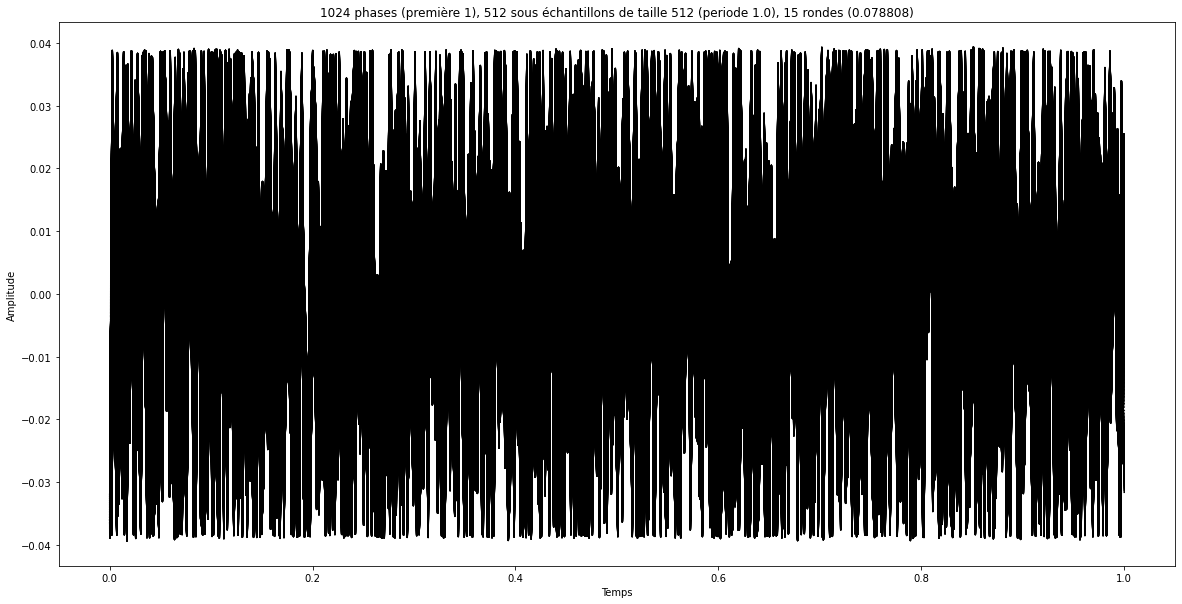

In [30]:
mn.CadreExperimental(nombrePhases=1024, rondes=15).entraine()

Le système est entrainé sur 1024 sous échantillons de taille 2048.
Le ratio entre la taille de ces sous échantillons et le nombre de phases est de 2.0.
Hardware utilisé : cuda:0
1024 phases (première 1), 1024 sous échantillons de taille 2048 (periode 1.0), 15 rondes (0.164049)
Ronde 1
Amplitude(entrainement): 0.163979  [    0/2097152]
Amplitude(entrainement): 0.117827  [524288/2097152]
Amplitude(entrainement): 0.105917  [1048576/2097152]
Amplitude(entrainement): 0.099684  [1572864/2097152]
Amplitude(test): 0.095946
Ronde 2
Amplitude(entrainement): 0.095684  [    0/2097152]
Amplitude(entrainement): 0.092447  [524288/2097152]
Amplitude(entrainement): 0.089985  [1048576/2097152]
Amplitude(entrainement): 0.087608  [1572864/2097152]
Amplitude(test): 0.086349
Ronde 3
Amplitude(entrainement): 0.085787  [    0/2097152]
Amplitude(entrainement): 0.084321  [524288/2097152]
Amplitude(entrainement): 0.082860  [1048576/2097152]
Amplitude(entrainement): 0.081662  [1572864/2097152]
Amplitude(test): 0.

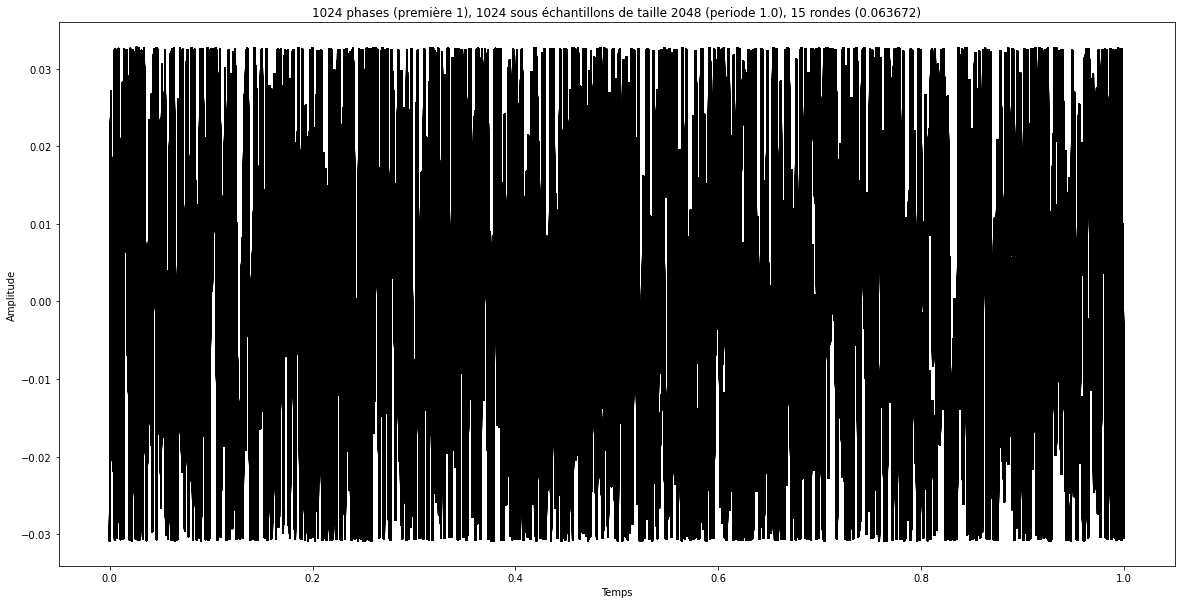

In [32]:
mn.CadreExperimental(nombrePhases=1024, rondes=15, tailleSousEchantillon=2048, nombreSousEchantillons=1024).entraine()